In [43]:
import os

from __future__ import annotations

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
import xarray as xr

from tqdm import tqdm

# グラフの色指定
colors = ["tab:blue", "tab:orange", "tab:green", "tab:red", "tab:purple", "tab:brown", "tab:pink", "tab:gray", "tab:olive", "tab:cyan"]
markers = ["o", "^", "s", "D", "P", "X", "d", "H", "v", "p", "*"]
linestyles = ["-", "--", "-.", ":", "-", "--", "-.", ":", "-", "--", "-.", ":"]

# グラフ全体のフォント設定
# plt.rcParams['font.family'] = 'serif'  # 全体のフォントをSerifに設定
# plt.rcParams['mathtext.fontset'] = 'cm'  # 数式のフォントをComputer Modernに設定
# plt.rcParams['mathtext.rm'] = 'serif'  # TeXの通常フォントをSerifに設定
# plt.rcParams['font.size'] = 18  # デフォルトフォントサイズ
# plt.rcParams['axes.labelsize'] = 18  # 軸ラベルのフォントサイズ
# plt.rcParams['axes.titlesize'] = 22  # タイトルのフォントサイズ
# plt.rcParams['legend.fontsize'] = 16  # 凡例のフォントサイズ
# plt.rcParams['grid.color'] = 'gray'  # グリッドの色を薄い灰色に設定
# plt.rcParams['grid.linestyle'] = ':'  # グリッドを点線に設定
# plt.rcParams['grid.linewidth'] = 0.5  # グリッドの線幅を設定

In [44]:
# kOutMin = 5
# kOutMax = 316
# n = 100_000
# gamma = 2.5

# output_dir = os.path.abspath(os.path.join("..", "app", "out", "edgelist"))
# output_dir = os.path.join(output_dir, f"n={n}", f"gamma={gamma:.2f}", f"kOutMin={kOutMin}", f"kOutMax={kOutMax}")


# # G = nx.read_edgelist(os.path.join(output_dir, "ER_0.txt"), nodetype=int)
# G = nx.read_edgelist(os.path.join(output_dir, "DirectedCMOutPow_0.txt"), create_using=nx.DiGraph(), nodetype=int)
# print(G.number_of_nodes())
# print(G.number_of_edges())


In [45]:
m0 = 6
m = 5
n = 1_000_000

output_dir = os.path.abspath(os.path.join("..", "out", "edgelist"))
output_dir = os.path.join(output_dir, f"n={n}", f"m0={m0}", f"m={m}", f"isDirected=true")


# G = nx.read_edgelist(os.path.join(output_dir, "BA_0.txt"), nodetype=int)
G = nx.read_edgelist(os.path.join(output_dir, "BA_0.txt"), create_using=nx.DiGraph(), nodetype=int)
print(G.number_of_nodes())
print(G.number_of_edges())


1000000
5000000


/var/folders/vv/tq6tx6p94wqgdfkf0hhvjs8c0000gn/T/ipykernel_52181/1174176302.py:11: RuntimeWarning: divide by zero encountered in power
  y = k_val **(-gamma)
/var/folders/vv/tq6tx6p94wqgdfkf0hhvjs8c0000gn/T/ipykernel_52181/1174176302.py:29: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax[1].legend()


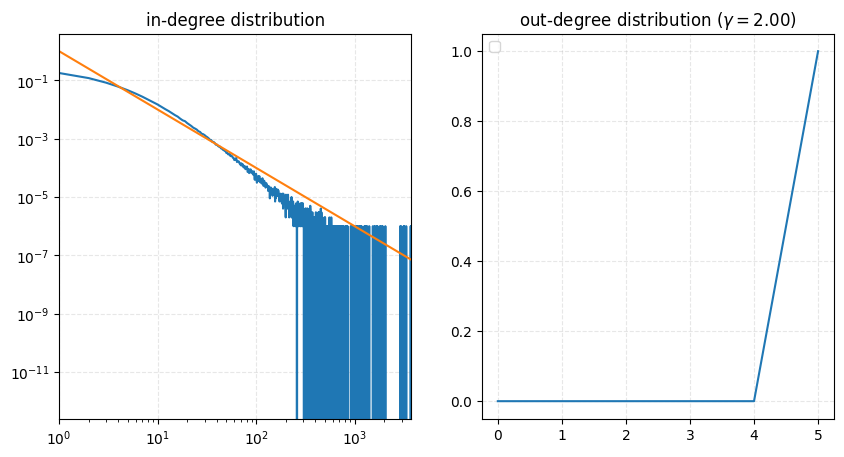

In [49]:
k_val = np.arange(0, G.number_of_nodes())
in_deg = np.array([G.in_degree(u) for u in k_val])
out_deg = np.array([G.out_degree(u) for u in k_val])

in_distribution = np.bincount(in_deg)
in_distribution = in_distribution / np.sum(in_distribution)
out_distribution = np.bincount(out_deg)
out_distribution = out_distribution / np.sum(out_distribution)

gamma=2.0
y = k_val **(-gamma)

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].plot(in_distribution, label="in-degree")
ax[0].plot(k_val, y, label=r"$y=k^{-\gamma}$")
ax[0].set_title("in-degree distribution")
ax[0].set_xscale("log")
ax[0].set_yscale("log")
ax[0].set_xlim(1, in_deg.max())
ax[0].grid(True, alpha=0.3, ls="--")

ax[1].plot(out_distribution)
# ax[1].set_xscale("log")
# ax[1].set_yscale("log")
ax[1].set_title(rf"out-degree distribution ($\gamma={gamma:.2f}$)")
# ax[1].plot(k_val, y, label=r"$y=k^{-\gamma}$")
# ax[1].set_xlim(1, G.number_of_nodes())
ax[1].grid(True, alpha=0.3, ls="--")
ax[1].legend()
plt.show()

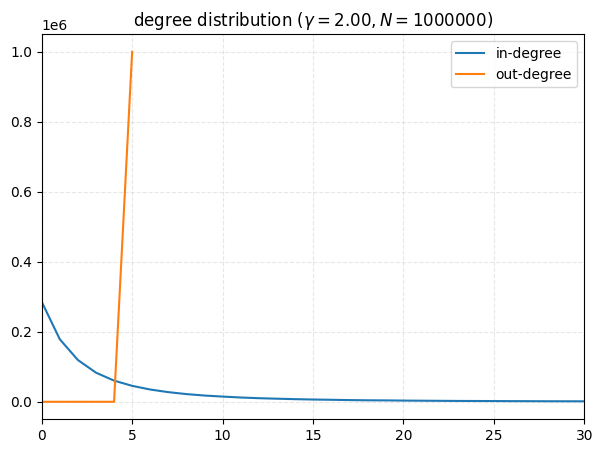

In [47]:
k_val = np.arange(0, G.number_of_nodes())
in_deg = np.array([G.in_degree(u) for u in k_val])
out_deg = np.array([G.out_degree(u) for u in k_val])

in_distribution = np.bincount(in_deg)
in_distribution = in_distribution
out_distribution = np.bincount(out_deg)
out_distribution = out_distribution

fig, ax = plt.subplots(1, 1, figsize=(7, 5))
ax.plot(in_distribution, label="in-degree")

ax.plot(out_distribution, label="out-degree")
ax.set_title(rf"degree distribution ($\gamma={gamma:.2f}, N={G.number_of_nodes()}$)")
ax.grid(True, alpha=0.3, ls="--")
ax.set_xlim(0, 30)
ax.legend()
plt.show()

/var/folders/vv/tq6tx6p94wqgdfkf0hhvjs8c0000gn/T/ipykernel_52181/419684144.py:8: RuntimeWarning: divide by zero encountered in power
  y = k_val **(-gamma)


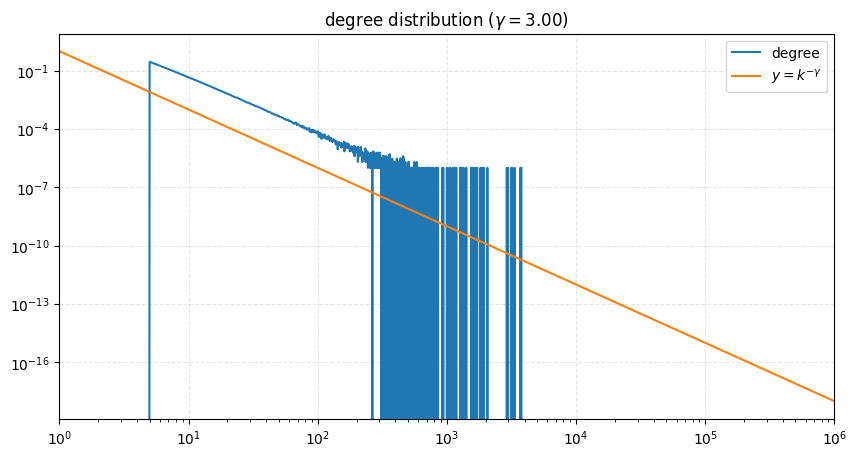

In [48]:
k_val = np.arange(0, G.number_of_nodes())
deg = np.array([G.degree(u) for u in k_val])

deg_distribution = np.bincount(deg)
deg_distribution = deg_distribution / np.sum(deg_distribution)

gamma=3.0
y = k_val **(-gamma)

fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.plot(deg_distribution, label="degree")
ax.set_title("degree distribution")
ax.grid(True, alpha=0.3, ls="--")
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_title(rf"degree distribution ($\gamma={gamma:.2f}$)")
ax.plot(k_val, y, label=r"$y=k^{-\gamma}$")
ax.set_xlim(1, G.number_of_nodes())
ax.grid(True, alpha=0.3, ls="--")
ax.legend()
plt.show()